The same approach as BaseModel #1

But it uses popular solution of model ensamble instead of my Neural Network

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./dataset/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

# Remove Categorical Data

In [4]:
numerical_train = train.select_dtypes(exclude="object")
numerical_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
numerical_train.shape

(1460, 38)

# Missing Values

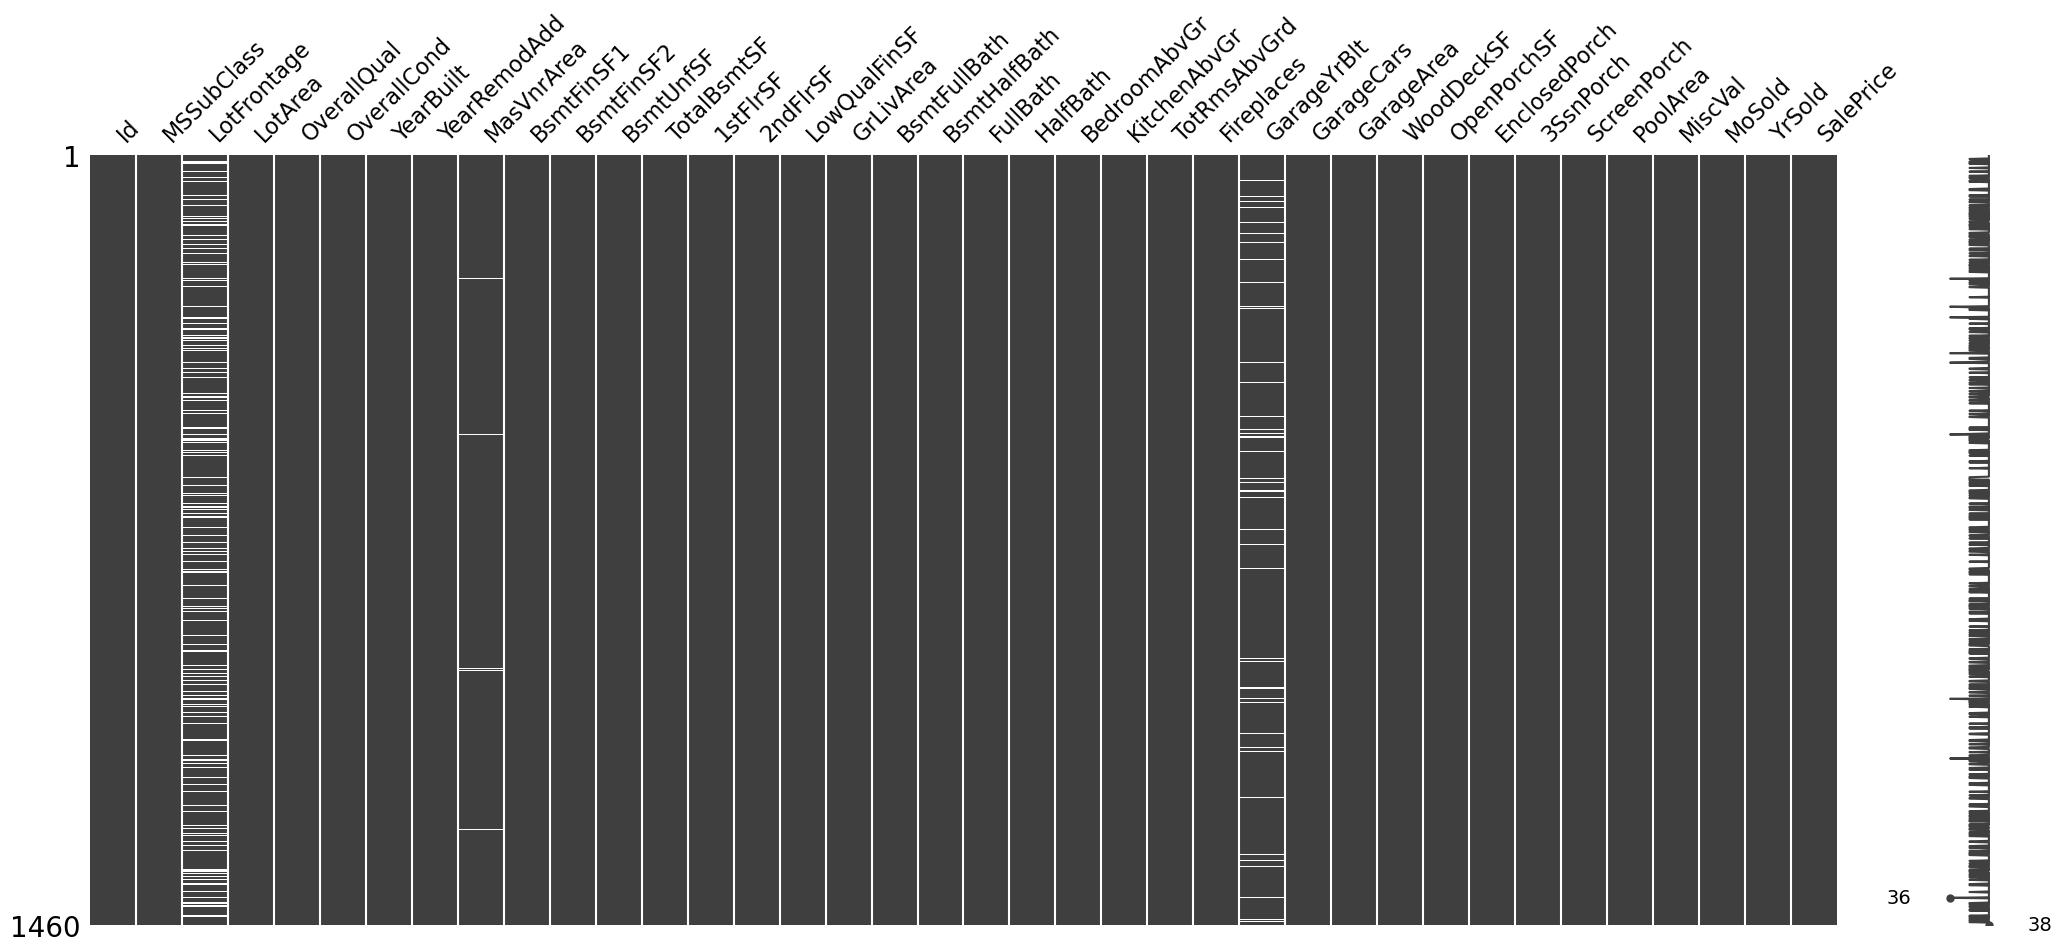

In [6]:
import missingno as msno

msno.matrix(numerical_train);

In [7]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    # Get Missing Velues per feature (exclude features that are complete)
    feature_missing = df.isnull().sum().sort_values(ascending = False)
    feature_missing = feature_missing[feature_missing > 0]
    percent = round(feature_missing/len(df)*100, 2)
    return pd.concat([feature_missing, percent], axis=1, keys=['Total','Percent'])

missing_percentage(numerical_train)

,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


In [8]:
numerical_train.drop(["LotFrontage"], axis=1, inplace=True)

In [9]:
missing_percentage(numerical_train)

,Total,Percent
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


In [10]:
means_to_fill = numerical_train.mean()
numerical_train.fillna(means_to_fill, inplace = True)

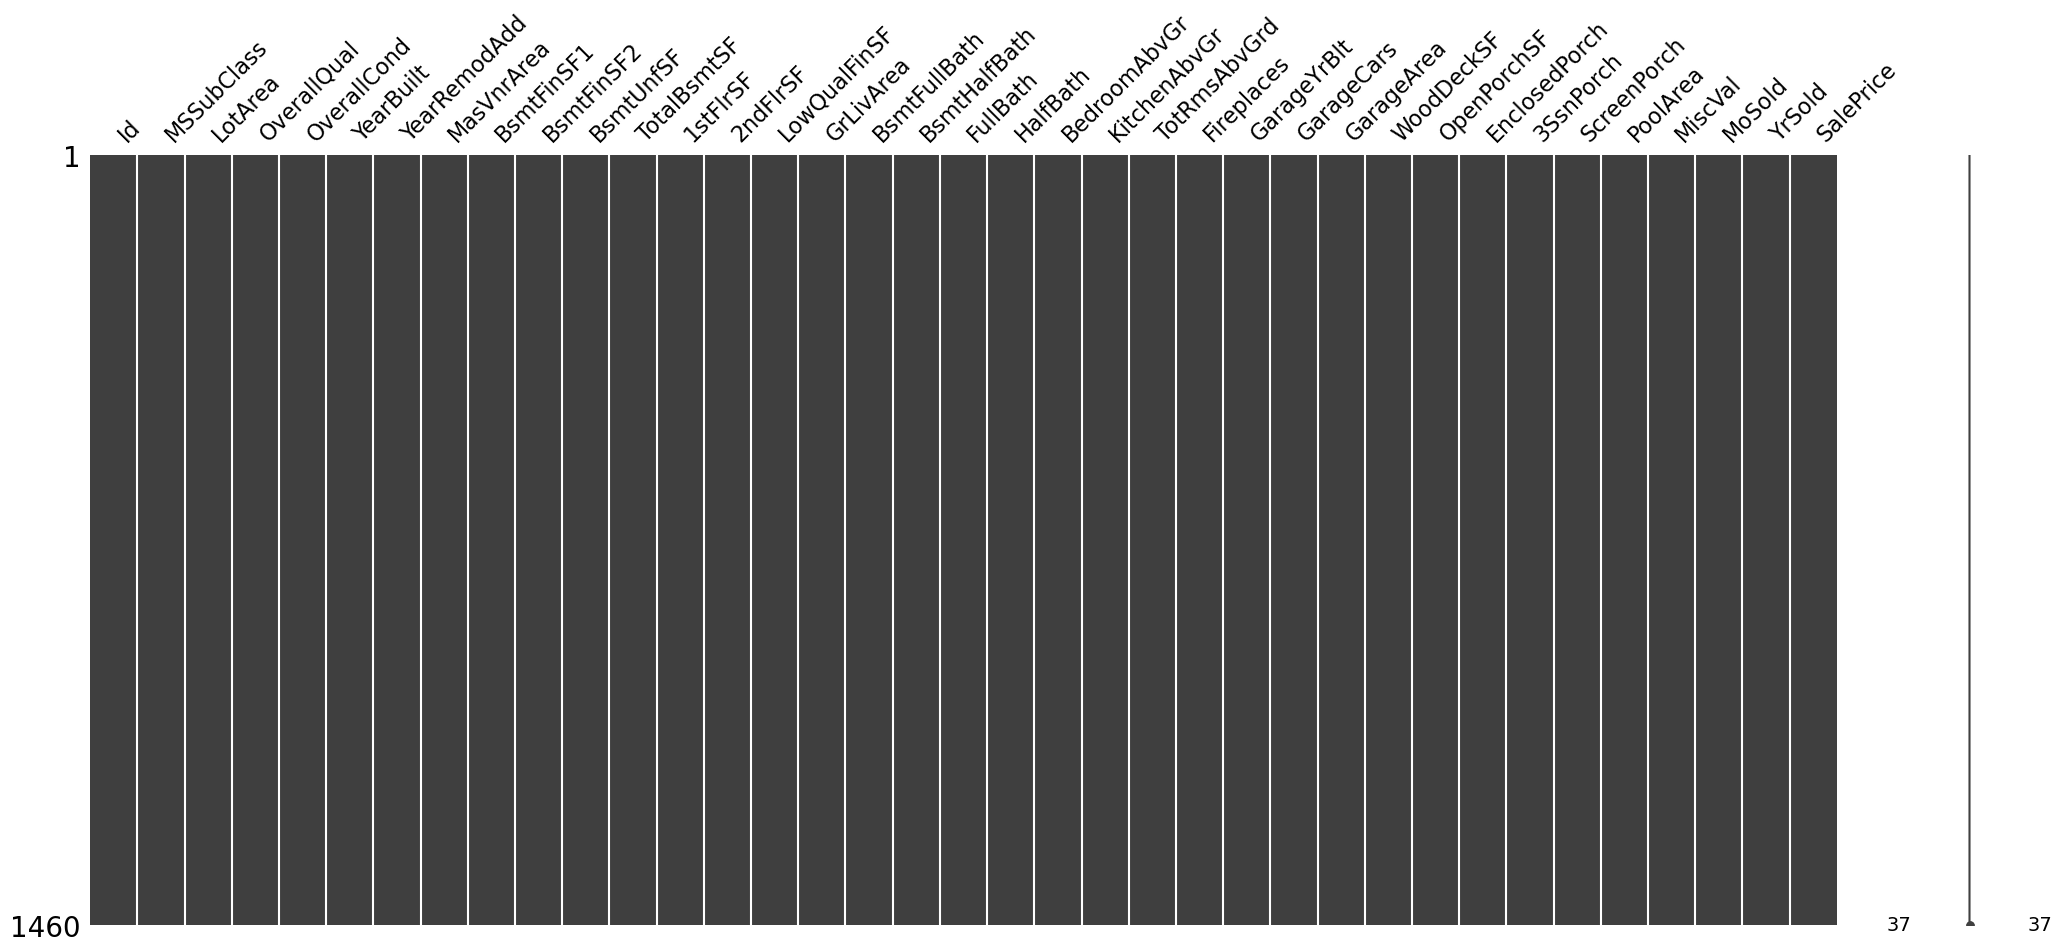

In [11]:
msno.matrix(numerical_train);

# Data Separation

In [12]:
y = numerical_train["SalePrice"]
X = numerical_train.drop(["SalePrice"], axis=1)

# Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

In [14]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [15]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [16]:
X.shape, y.shape

((1460, 36), (1460,))

# Modeling

Inspiration:
- https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook#Models 
- https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb/notebook#Now-,-we-are-getting-started-with-the-process-of-modelling 

In [17]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from datetime import datetime
import numpy as np

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X, y=y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [18]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [31]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=int(1e5), alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=int(1e5), alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [32]:
gbr = GradientBoostingRegressor(
    n_estimators=3000, 
    learning_rate=0.05,
    max_depth=4, 
    max_features='sqrt', 
    min_samples_leaf=15, 
    min_samples_split=10, 
    loss='huber', 
    random_state =42
) 

In [33]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [34]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [35]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [36]:
score = cv_rmse(ridge)
score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29485929772.223633, tolerance: 717847203.8126535
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29485748050.82422, tolerance: 717847203.8126535
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29485889115.836914, tolerance: 717847203.8126535
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_h

LASSO: 36021.2427 (10876.6302)
 2023-04-07 17:08:12.408636


c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619533387557.8047, tolerance: 717847203.8126535
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59141943807.58215, tolerance: 717847203.8126535
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2049857404.739746, tolerance: 717847203.8126535
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_hou

elastic net: 36019.6814 (10875.6432)
 2023-04-07 17:14:32.344300
SVR: 80971.1331 (7904.9305)
 2023-04-07 17:14:34.618097
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, su

In [37]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen


c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24870338938.60083, tolerance: 636542084.4222412
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24868927124.802246, tolerance: 636542084.4222412
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24869369417.260864, tolerance: 636542084.4222412
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_h

[17:24:31] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:33] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:35] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:37] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:39] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[

c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658834522623.8832, tolerance: 787334624.1028304
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36591782515.6084, tolerance: 787334624.1028304
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1424792076.359375, tolerance: 787334624.1028304
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_hous

[17:25:25] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
elasticnet


c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658834522623.8832, tolerance: 787334624.1028304
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36591782515.6084, tolerance: 787334624.1028304
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_house\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1424792076.359375, tolerance: 787334624.1028304
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nikit\anaconda3\envs\kaggle_hous

Lasso
Ridge
Svr
GradientBoosting
xgboost
[17:26:07] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
lightgbm


In [38]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [39]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
18031.391160879855


# Submission

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.733238,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.574410,0.053428,0.604293,...,1.202536,0.365179,-0.704483,-0.359325,-0.116339,1.882709,-0.068692,-0.087688,-0.119110,1.64521
1,1.735610,-0.872563,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.023903,1.051363,-0.288653,...,-0.753188,2.384400,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,25.116309,-0.119110,1.64521
2,1.737983,0.073375,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.574410,0.761852,-0.288653,...,0.042202,0.939819,-0.191147,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.64521
3,1.740356,0.073375,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.463612,0.347326,-0.288653,...,-0.013943,2.121024,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,1.64521
4,1.742728,1.492282,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.574410,-0.396190,-0.288653,...,0.154492,-0.752176,0.533564,-0.359325,-0.116339,2.313293,-0.068692,-0.087688,-1.969111,1.64521


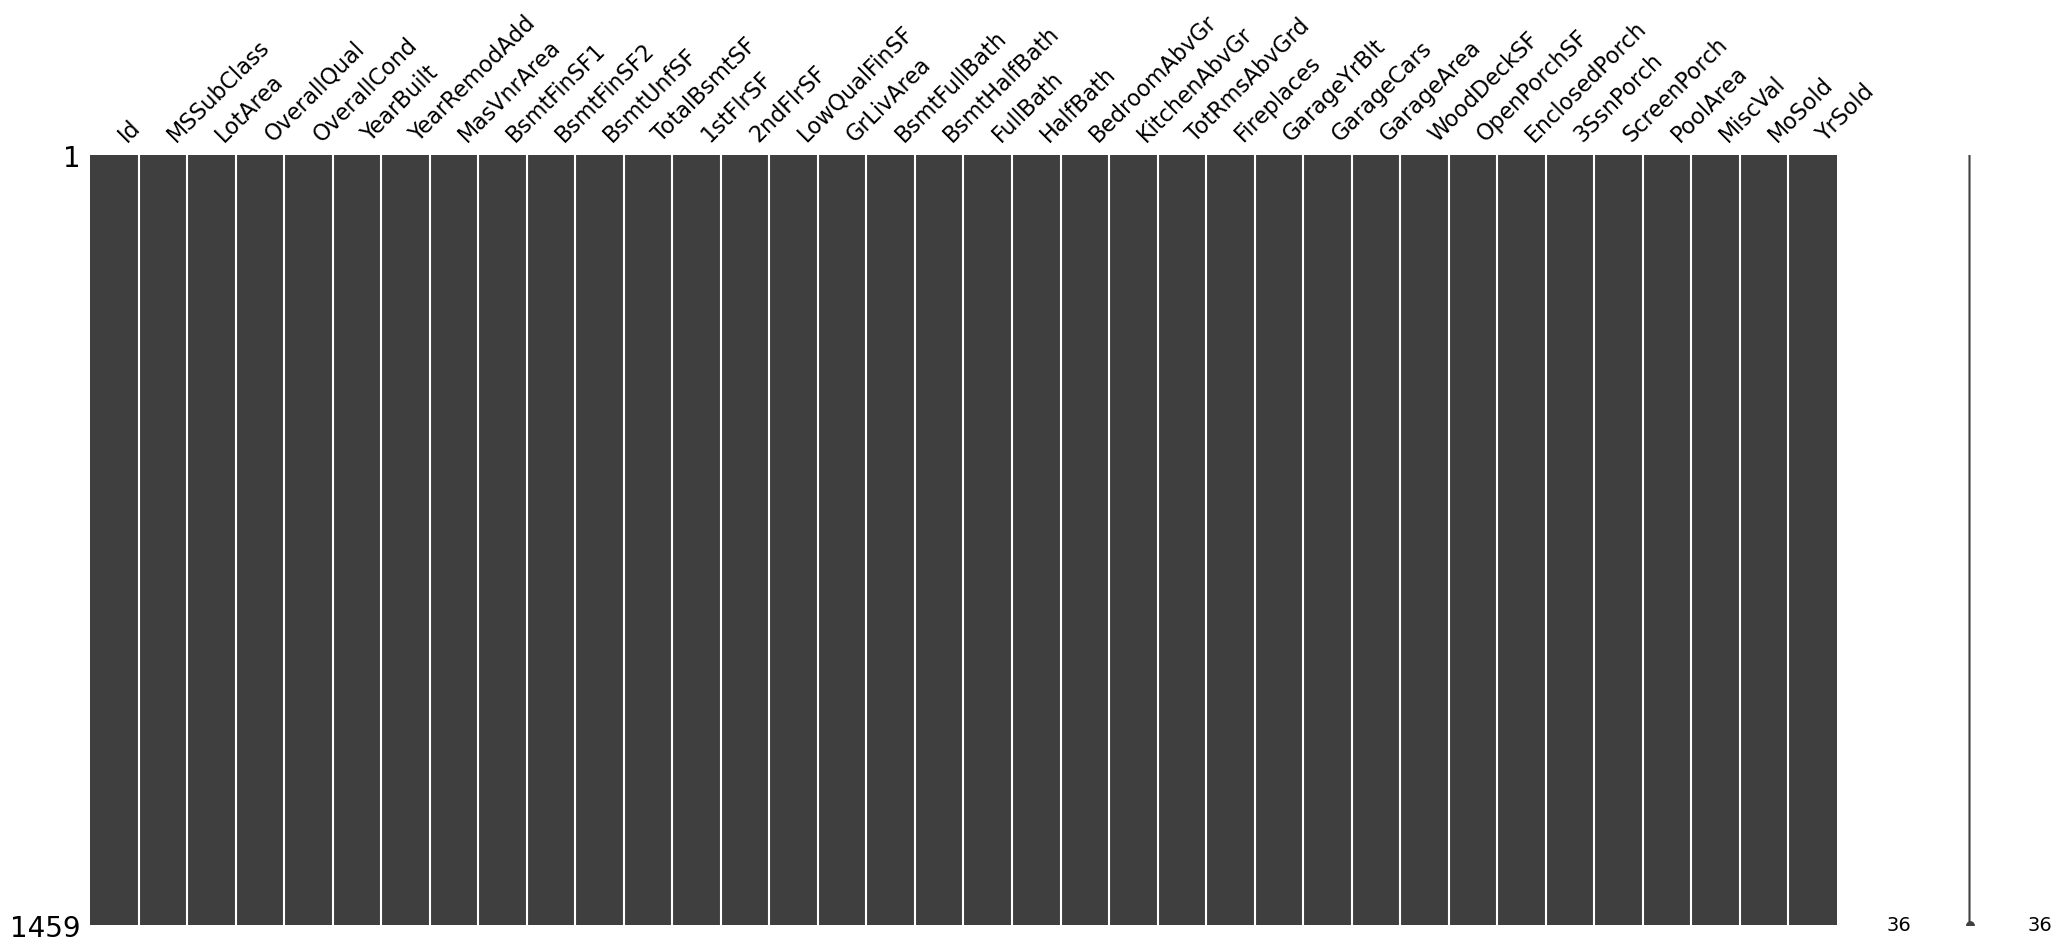

In [40]:
test = pd.read_csv("./dataset/test.csv")
test = test.select_dtypes(exclude="object")
test.drop(["LotFrontage"], axis=1, inplace=True)
test.fillna(means_to_fill, inplace = True)   ## PS: I must use statistical values from training set only!
msno.matrix(test);

X_test = pd.DataFrame(scaler.transform(test))
X_test.head()

In [41]:
X_test.shape

(1459, 36)

In [42]:
print('Predict submission')
submission = pd.read_csv("./dataset/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_test)))

Predict submission


C:\Users\nikit\AppData\Local\Temp\ipykernel_3920\2553567646.py:3: RuntimeWarning: overflow encountered in expm1
  submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_test)))


In [44]:
blend_models_predict(X_test)

array([127926.36651548, 159666.66840248, 180956.383941  , ...,
       179395.39519928, 115677.85710845, 229802.03100746])

In [43]:
submission

,Id,SalePrice
0,1461,inf
1,1462,inf
2,1463,inf
3,1464,inf
4,1465,inf
...,...,...
1454,2915,inf
1455,2916,inf
1456,2917,inf
1457,2918,inf


In [45]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': blend_models_predict(X_test)})
my_submission.to_csv('submission_BL5.csv', index=False)

Final Score: 0.1356